<a href="https://colab.research.google.com/github/julia-cascante/julia-cascante/blob/main/Estadistical_analysis_experimentation_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing "dplyr"

In [1]:
if (!require(dplyr)) {
  install.packages("dplyr")
  library(dplyr)
}

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Data

In [2]:

set.seed(123)
num_clientes <- 200
datos_bancarios <- data.frame(
  ClienteID = 1:num_clientes,
  Edad = sample(18:65, num_clientes, replace = TRUE),
  Género = sample(c("Masculino", "Femenino"), num_clientes, replace = TRUE),
  Ingresos = rnorm(num_clientes, mean = 50000, sd = 10000),
  Saldo_Cuenta = rnorm(num_clientes, mean = 1000, sd = 500),
  Cantidad_Transacción = rnorm(num_clientes, mean = 100, sd = 50),
  Tipo_Cuenta = sample(c("Cuenta de Ahorro", "Cuenta Corriente"), num_clientes, replace = TRUE)
)

Data summary



In [3]:
summary(datos_bancarios)

   ClienteID           Edad          Género             Ingresos    
 Min.   :  1.00   Min.   :18.00   Length:200         Min.   :16893  
 1st Qu.: 50.75   1st Qu.:31.00   Class :character   1st Qu.:41748  
 Median :100.50   Median :42.00   Mode  :character   Median :49748  
 Mean   :100.50   Mean   :42.34                      Mean   :49224  
 3rd Qu.:150.25   3rd Qu.:53.25                      3rd Qu.:56832  
 Max.   :200.00   Max.   :65.00                      Max.   :74596  
  Saldo_Cuenta    Cantidad_Transacción Tipo_Cuenta       
 Min.   :-523.5   Min.   :-29.35       Length:200        
 1st Qu.: 643.0   1st Qu.: 64.22       Class :character  
 Median : 981.4   Median : 95.54       Mode  :character  
 Mean   : 956.6   Mean   : 98.57                         
 3rd Qu.:1279.7   3rd Qu.:133.18                         
 Max.   :2528.6   Max.   :265.22                         

Average per gender

In [4]:
datos_bancarios %>%
  group_by(Género) %>%
  summarise(Promedio_Ingresos = mean(Ingresos))

Género,Promedio_Ingresos
<chr>,<dbl>
Femenino,48423.05
Masculino,49839.97


Average per account

In [5]:
datos_bancarios %>%
  group_by(Tipo_Cuenta) %>%
  summarise(Promedio_Saldo = mean(Saldo_Cuenta))

Tipo_Cuenta,Promedio_Saldo
<chr>,<dbl>
Cuenta Corriente,880.4737
Cuenta de Ahorro,1025.5558


Ploting

In [7]:
library(ggplot2)

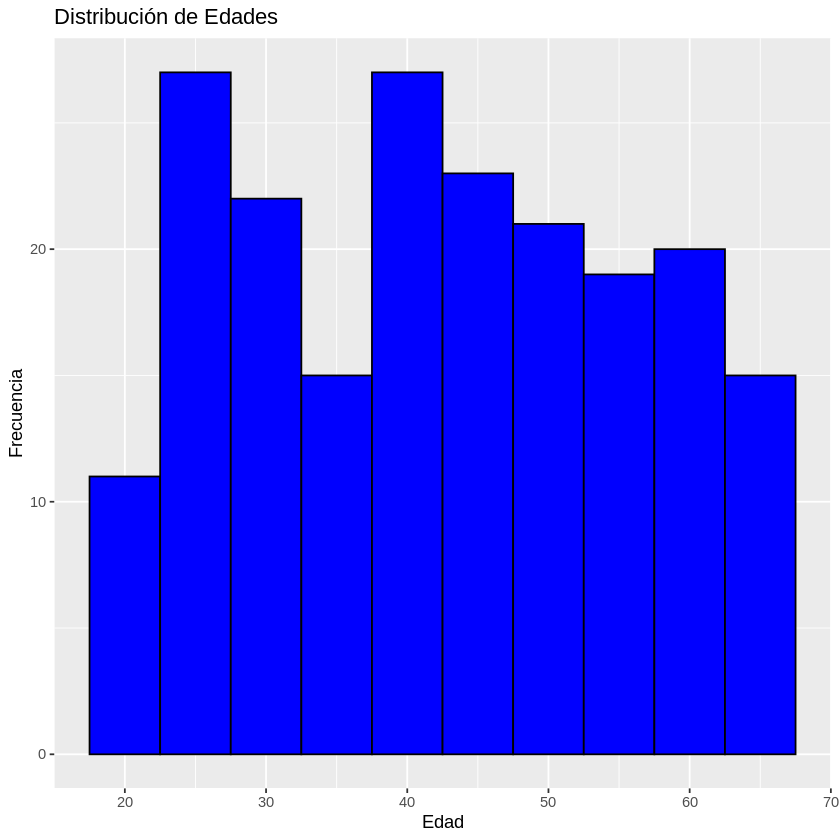

In [8]:

ggplot(datos_bancarios, aes(x = Edad)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black") +
  labs(title = "Distribución de Edades", x = "Edad", y = "Frecuencia")

Profit plot

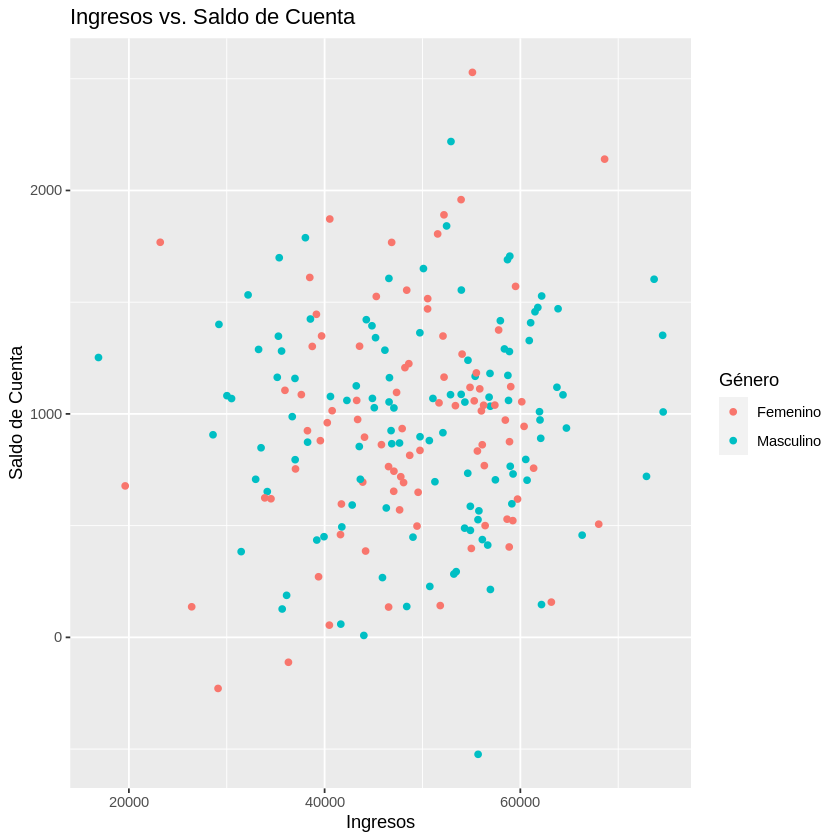

In [9]:
ggplot(datos_bancarios, aes(x = Ingresos, y = Saldo_Cuenta, color = Género)) +
  geom_point() +
  labs(title = "Ingresos vs. Saldo de Cuenta", x = "Ingresos", y = "Saldo de Cuenta")


Seleccionar las variables numéricas relevantes

In [10]:
variables_numericas <- datos_bancarios[, c("Edad", "Ingresos", "Saldo_Cuenta", "Cantidad_Transacción")]

Medidas de tendencia central

In [11]:
mediana_valores <- apply(variables_numericas, 2, median)
media_valores <- apply(variables_numericas, 2, mean)

Medidas de dispersion

In [12]:
desviacion_estandar <- apply(variables_numericas, 2, sd)
rango_valores <- apply(variables_numericas, 2, function(x) diff(range(x)))

Resumen estadistico

In [13]:
resumen_estadistico <- data.frame(
  Variable = colnames(variables_numericas),
  Mediana = mediana_valores,
  Media = media_valores,
  DesviacionEstandar = desviacion_estandar,
  Rango = rango_valores
)

In [14]:
print(resumen_estadistico)

                                 Variable     Mediana       Media
Edad                                 Edad    42.00000    42.34000
Ingresos                         Ingresos 49748.06361 49223.60861
Saldo_Cuenta                 Saldo_Cuenta   981.41425   956.64177
Cantidad_Transacción Cantidad_Transacción    95.54262    98.56907
                     DesviacionEstandar      Rango
Edad                           13.34785    47.0000
Ingresos                    10461.64274 57702.4674
Saldo_Cuenta                  482.86691  3052.0459
Cantidad_Transacción           49.65314   294.5631


New data set creation

In [ ]:
sampled_data <- data.frame()

In [15]:
quota_sample <- function(category) {
  subset <- vDatos[vDatos$datos_bancarios == category, ]
  sampled_subset <- subset[sample(1:nrow(subset), size = quota_size, replace = FALSE), ]
  return(sampled_subset)
}